<a href="https://colab.research.google.com/github/milyeon/Study_/blob/main/09_3_%EB%AC%B8%EC%A0%9C%ED%95%B4%EA%B2%B0_%EA%B3%BC%EC%A0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

17473536/17464789 [==============================] - 0s 0us/step


In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [3]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [5]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_lstm_model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model. fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 16s 43ms/step - loss: 0.6927 - accuracy: 0.5253 - val_loss: 0.6921 - val_accuracy: 0.5508
Epoch 2/100
313/313 [==============================] - 19s 62ms/step - loss: 0.6904 - accuracy: 0.6022 - val_loss: 0.6888 - val_accuracy: 0.6300
Epoch 3/100
313/313 [==============================] - 25s 80ms/step - loss: 0.6845 - accuracy: 0.6599 - val_loss: 0.6794 - val_accuracy: 0.6774
Epoch 4/100
313/313 [==============================] - 18s 59ms/step - loss: 0.6619 - accuracy: 0.6981 - val_loss: 0.6302 - val_accuracy: 0.7150
Epoch 5/100
313/313 [==============================] - 20s 64ms/step - loss: 0.5888 - accuracy: 0.7230 - val_loss: 0.5718 - val_accuracy: 0.7266
Epoch 6/100
313/313 [==============================] - 20s 63ms/step - loss: 0.5555 - accuracy: 0.7385 - val_loss: 0.5484 - val_accuracy: 0.7446
Epoch 7/100
313/313 [==============================] - 19s 61ms/step - loss: 0.5317 - accuracy: 0.7552 - val_loss: 0.5266 - val_ac

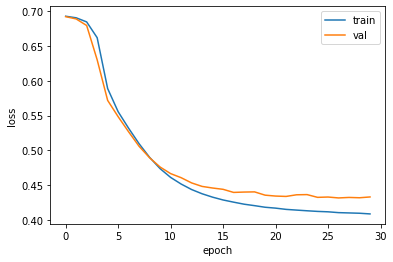

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [7]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

In [8]:
model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_1 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_2 (LSTM)               (None, 8)                 544       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [9]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model3.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 32s 86ms/step - loss: 0.6929 - accuracy: 0.5178 - val_loss: 0.6927 - val_accuracy: 0.5246
Epoch 2/100
313/313 [==============================] - 26s 82ms/step - loss: 0.6918 - accuracy: 0.5724 - val_loss: 0.6906 - val_accuracy: 0.6178
Epoch 3/100
313/313 [==============================] - 26s 82ms/step - loss: 0.6876 - accuracy: 0.6290 - val_loss: 0.6829 - val_accuracy: 0.6570
Epoch 4/100
313/313 [==============================] - 26s 83ms/step - loss: 0.6697 - accuracy: 0.6638 - val_loss: 0.6472 - val_accuracy: 0.6880
Epoch 5/100
313/313 [==============================] - 26s 82ms/step - loss: 0.5965 - accuracy: 0.7074 - val_loss: 0.5649 - val_accuracy: 0.7124
Epoch 6/100
313/313 [==============================] - 26s 84ms/step - loss: 0.5377 - accuracy: 0.7356 - val_loss: 0.5232 - val_accuracy: 0.7430
Epoch 7/100
313/313 [==============================] - 26s 84ms/step - loss: 0.5142 - accuracy: 0.7541 - val_loss: 0.5021 - val_ac

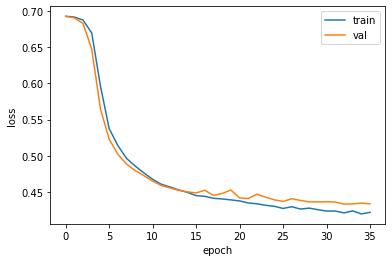

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [11]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

In [13]:
model4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [16]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model4.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 18s 52ms/step - loss: 0.6924 - accuracy: 0.5242 - val_loss: 0.6918 - val_accuracy: 0.5432
Epoch 2/100
313/313 [==============================] - 15s 49ms/step - loss: 0.6905 - accuracy: 0.5720 - val_loss: 0.6899 - val_accuracy: 0.5598
Epoch 3/100
313/313 [==============================] - 15s 48ms/step - loss: 0.6878 - accuracy: 0.5916 - val_loss: 0.6869 - val_accuracy: 0.5826
Epoch 4/100
313/313 [==============================] - 15s 47ms/step - loss: 0.6837 - accuracy: 0.6041 - val_loss: 0.6826 - val_accuracy: 0.5906
Epoch 5/100
313/313 [==============================] - 15s 47ms/step - loss: 0.6777 - accuracy: 0.6130 - val_loss: 0.6763 - val_accuracy: 0.5976
Epoch 6/100
313/313 [==============================] - 15s 47ms/step - loss: 0.6694 - accuracy: 0.6211 - val_loss: 0.6678 - val_accuracy: 0.6070
Epoch 7/100
313/313 [==============================] - 15s 47ms/step - loss: 0.6582 - accuracy: 0.6318 - val_loss: 0.6568 - val_ac

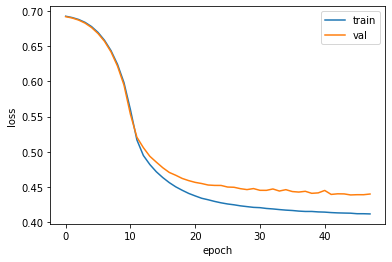

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [19]:
test_seq = pad_sequences(test_input, maxlen=100)
rnn_model = keras.models.load_model('best-2rnn-model.h5')
rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 12s 14ms/step - loss: 0.4287 - accuracy: 0.8012


[0.42867764830589294, 0.8011999726295471]